In [ ]:
# Impor pustaka yang diperlukan
import pandas as pd

# Baca dataset dari file CSV
df = pd.read_csv("jabodetabeksur_olx_housing_dataset.csv")

# Normalisasi kolom teks
df['address_city'] = df['address_city'].str.title()
df['type'] = df['type'].str.title()

# Ringkasan jumlah iklan per kota
ads_per_city = df['address_city'].value_counts().reset_index()
ads_per_city.columns = ['Kota', 'Jumlah Iklan']
print("\nJumlah Iklan per Kota:")
print(ads_per_city)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca dataset
df = pd.read_csv(r"C:\Users\madea\OneDrive\Documents\Kuliah\Semester 8\Tugas Akhir\Coding\Data Gathering\Final Dataset\jabodetabeksur_olx_housing_dataset.csv")

df = df.dropna(subset=['address_city', 'address_district', 'address_subdistrict', 'price'])
# Fungsi bantu untuk format harga Rupiah
def format_rupiah(x):
    try:
        x = float(x)
        return f"Rp{x:,.0f}".replace(",", ".")
    except:
        return x



In [ ]:
# 2. Pra-pemrosesan
df['address_city'] = df['address_city'].str.title()
df['type'] = df['type'].str.title()



In [12]:
# 3. Ringkasan jumlah iklan per kota
ads_per_city = df['address_city'].value_counts().reset_index()
ads_per_city.columns = ['Kota', 'Jumlah Iklan']
print("\nJumlah Iklan per Kota:")
print(ads_per_city)


Jumlah Iklan per Kota:
                      Kota  Jumlah Iklan
0            Surabaya Kota          2364
1              Bekasi Kota          1831
2               Depok Kota          1771
3          Jakarta Selatan          1619
4   Tangerang Selatan Kota          1600
5           Tangerang Kota          1149
6            Jakarta Timur          1146
7            Jakarta Barat           910
8               Bogor Kota           798
9               Bogor Kab.           749
10           Jakarta Utara           728
11          Tangerang Kab.           529
12           Jakarta Pusat           446
13             Bekasi Kab.           228
14          Sidoarjo  Kab.           131
15             Gresik Kab.            18
16        Kepulauan Seribu             2
17            Bandung Kab.             1


In [13]:
# 4. Statistik harga properti per kota
price_stats = df.groupby('address_city')['price'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
price_stats.columns = ['Kota', 'Jumlah Iklan', 'Rata-rata Harga', 'Median Harga', 'Harga Minimum', 'Harga Maksimum']

# Format ke Rupiah
for col in ['Rata-rata Harga', 'Median Harga', 'Harga Minimum', 'Harga Maksimum']:
    price_stats[col] = price_stats[col].apply(format_rupiah)

print("\nStatistik Harga Properti per Kota:")
print(price_stats)


Statistik Harga Properti per Kota:
                      Kota  Jumlah Iklan   Rata-rata Harga     Median Harga  \
0             Bandung Kab.             1     Rp770.000.000    Rp770.000.000   
1              Bekasi Kab.           228   Rp2.221.137.741    Rp784.000.000   
2              Bekasi Kota          1831   Rp5.092.690.315    Rp900.000.000   
3               Bogor Kab.           749   Rp1.001.139.916    Rp600.000.000   
4               Bogor Kota           798   Rp4.544.680.951  Rp1.075.000.000   
5               Depok Kota          1771   Rp2.181.111.195    Rp700.000.000   
6              Gresik Kab.            18     Rp776.059.917    Rp682.499.500   
7            Jakarta Barat           910   Rp7.854.341.827  Rp2.115.000.000   
8            Jakarta Pusat           446   Rp3.230.322.016    Rp900.000.000   
9          Jakarta Selatan          1619   Rp8.234.794.609  Rp2.900.000.000   
10           Jakarta Timur          1146   Rp2.253.313.869  Rp1.400.000.000   
11           Jak

In [14]:
# 5. Jumlah properti berdasarkan tipe dan kota
ads_type_city = df.groupby(['address_city', 'type']).size().unstack(fill_value=0)
print("\nJumlah Properti Berdasarkan Tipe dan Kota:")
print(ads_type_city)


Jumlah Properti Berdasarkan Tipe dan Kota:
type                    Apartemen  Rumah
address_city                            
Bandung Kab.                    0      1
Bekasi Kab.                     3    225
Bekasi Kota                    66   1765
Bogor Kab.                      2    747
Bogor Kota                     16    782
Depok Kota                     33   1738
Gresik Kab.                     1     17
Jakarta Barat                 187    723
Jakarta Pusat                 136    310
Jakarta Selatan               285   1334
Jakarta Timur                 104   1042
Jakarta Utara                 203    525
Kepulauan Seribu                0      2
Sidoarjo  Kab.                  3    128
Surabaya Kota                 335   2029
Tangerang Kab.                102    427
Tangerang Kota                134   1015
Tangerang Selatan Kota        104   1496


<Figure size 1200x600 with 0 Axes>

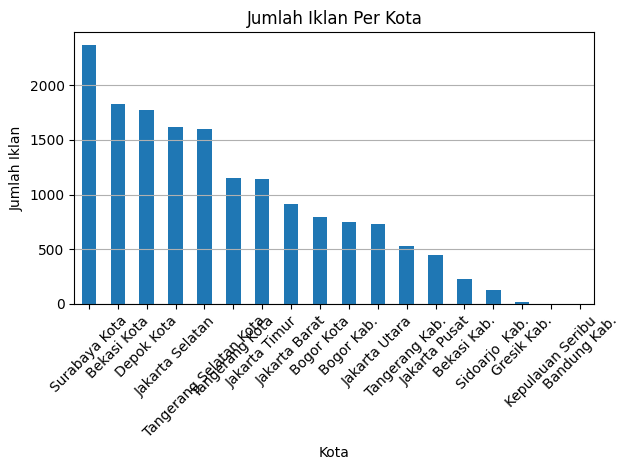

In [15]:
# 6. Visualisasi: Jumlah Iklan per Kota
plt.figure(figsize=(12,6))
df_plot = ads_per_city.set_index('Kota').sort_values('Jumlah Iklan', ascending=False)
df_plot.plot(kind='bar', legend=False)
plt.title('Jumlah Iklan Per Kota')
plt.ylabel('Jumlah Iklan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

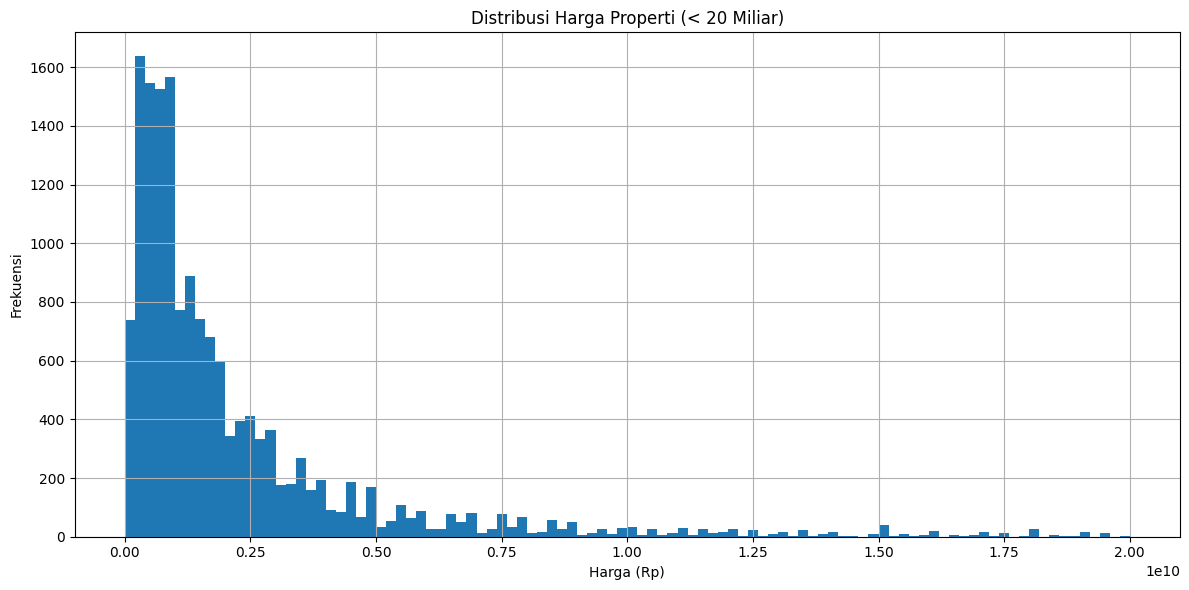

In [16]:
# 7. Visualisasi: Distribusi Harga Properti (< 20 Miliar)
plt.figure(figsize=(12,6))
df[df['price'] < 2e10]['price'].hist(bins=100)
plt.title('Distribusi Harga Properti (< 20 Miliar)')
plt.xlabel('Harga (Rp)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
# 8. Deteksi Outlier Potensial
outliers = df[df['price'] > 5e10]  # harga di atas 50 miliar
print("\nOutlier Harga (di atas Rp50 Miliar):")
print(outliers[['title', 'price', 'address_city']])


Outlier Harga (di atas Rp50 Miliar):
                                                   title         price  \
201                        rumh 2 di jual minat chat aja  9.000000e+11   
550    Apartemen Taman Melati Margonda Fully Furnishe...  4.000000e+11   
1165   Dijual Murah Rumah Minimalis Modern Dekat Mall...  8.900000e+11   
3041   Di jual kontrakan petakan 17 pintu di jati sar...  3.500000e+12   
3358     DIJUAL RUMAH CLUSTER KARIMA RESIDENCE JATIMURNI  1.900000e+12   
...                                                  ...           ...   
14866  Jual Rumah Luxury Modern VILLA BUKIT REGENCY P...  5.980000e+10   
15023  RUMAH PAKUWON INDAH EUROPEAN CLASSIC SANGAT ME...  7.500000e+10   
15131  Bukit golf rumah mewah siap huni 2lt golf view...  8.900000e+10   
15293            Graha family 2lt klasik eropa golf view  6.500000e+10   
16040  Rumah Graha Famili Mewah n Prestisius dg Long ...  8.000000e+10   

        address_city  
201       Depok Kota  
550       Depok Kota  
1165

In [1]:
import pandas as pd

# Baca dataset
df = pd.read_csv(r"C:\Users\madea\OneDrive\Documents\Kuliah\Semester 8\Tugas Akhir\Coding\Data Gathering\Final Dataset\jabodetabeksur_olx_housing_dataset.csv")

# Drop data yang tidak lengkap
df = df.dropna(subset=['address_city', 'type', 'land_area', 'building_area'])

# Normalisasi
df['address_city'] = df['address_city'].str.title()
df['type'] = df['type'].str.title()

# Hitung statistik
summary = df.groupby(['address_city', 'type']).agg(
    min_land_area=('land_area', 'min'),
    max_land_area=('land_area', 'max'),
    mean_land_area=('land_area', 'mean'),
    min_building_area=('building_area', 'min'),
    max_building_area=('building_area', 'max'),
    mean_building_area=('building_area', 'mean')
).reset_index()

# Hitung range terhadap rata-rata
summary['range_land_area'] = summary['max_land_area'] - summary['mean_land_area']
summary['range_building_area'] = summary['max_building_area'] - summary['mean_building_area']

# Tampilkan hasil
print(summary)


              address_city       type  min_land_area  max_land_area  \
0             Bandung Kab.      Rumah           90.0           90.0   
1              Bekasi Kab.  Apartemen            0.0           42.0   
2              Bekasi Kab.      Rumah           40.0          450.0   
3              Bekasi Kota  Apartemen            0.0       290000.0   
4              Bekasi Kota      Rumah            0.0         3200.0   
5               Bogor Kab.  Apartemen            0.0            0.0   
6               Bogor Kab.      Rumah            7.0         3000.0   
7               Bogor Kota  Apartemen            0.0           60.0   
8               Bogor Kota      Rumah           10.0         5250.0   
9               Depok Kota  Apartemen            0.0        31415.0   
10              Depok Kota      Rumah            0.0         3000.0   
11             Gresik Kab.  Apartemen           36.0           36.0   
12             Gresik Kab.      Rumah           60.0         1085.0   
13    